<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/Segmentacao_e_salva_TODAS_FotoS_v01_junho_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.9MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


Cloning into 'Doutorado'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 256 (delta 1), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (256/256), 71.51 MiB | 33.11 MiB/s, done.
Resolving deltas: 100% (124/124), done.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


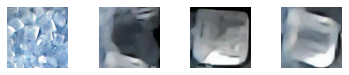

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [9]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [10]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

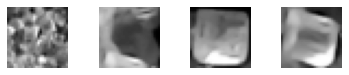

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
# Segmentation: start here......

In [13]:
# start top

In [14]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [15]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [16]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [17]:
print(img.shape)

(1200, 1200)


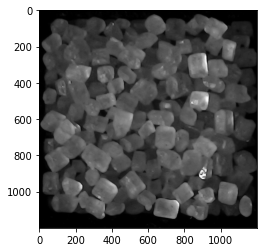

In [18]:
plt.imshow(img, cmap = "gray")

In [19]:
#First top

In [20]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [21]:
#2nd top

In [22]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [23]:
#3th top

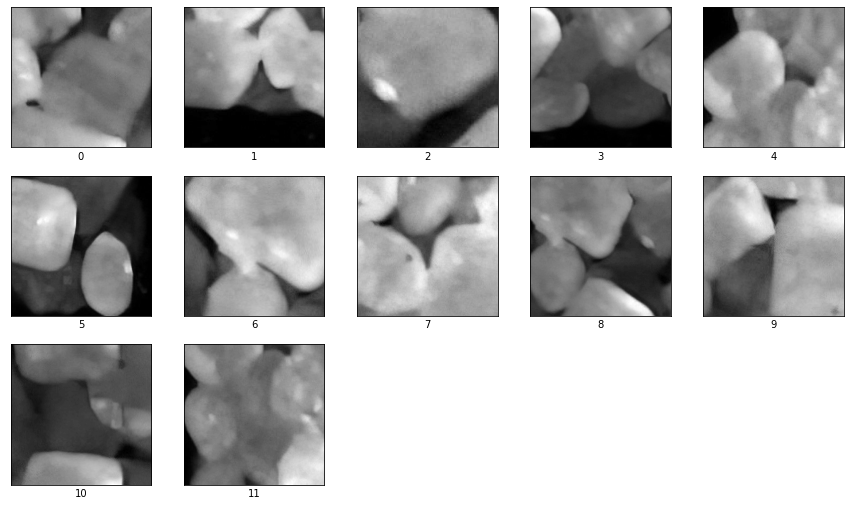

In [24]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [25]:
#4th top

In [26]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_top.append(Valor)

i= 0 =====
Tipo=G
i= 1 =====
Tipo=V
i= 2 =====
Tipo=I
i= 3 =====
Tipo=V
i= 4 =====
Tipo=V
i= 5 =====
Tipo=G
i= 6 =====
Tipo=I
i= 7 =====
Tipo=V
i= 8 =====
Tipo=B
i= 9 =====
Tipo=V
i= 10 =====
Tipo=B
i= 11 =====
Tipo=V


<Figure size 1080x1080 with 0 Axes>

In [27]:
# 5th top

In [28]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [29]:
# 6th top

In [30]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top,True)
print(img28_top)

   Type           0           1  ...         781         782         783
0     G  107.923119  108.571747  ...   68.056602   73.477669   76.274536
1     V   33.440060   55.206326  ...    0.932553    0.915578    0.735594
2     I   64.248894   74.231117  ...   87.022232   86.804459   87.648895
3     V  178.497833  183.958344  ...    0.000000    0.000000    0.000000
4     V    0.000000    0.250000  ...   76.333336   74.472221   97.166664
5     G   46.327374   44.631996  ...    0.000799    0.000000    0.000000
6     I   56.919998   61.160000  ...   58.359997   55.439999   49.959999
7     V  102.135330  101.401337  ...   87.637398   89.739151   86.608994
8     B   95.789307   93.920319  ...   41.835915   42.290024   41.834385
9     V   74.458107   75.320274  ...  100.044655   93.843529  106.988197
10    B   47.949413   98.206116  ...   78.475502   78.190445   77.822266
11    V   77.696999   81.007858  ...  116.838936  112.481895  112.229858

[12 rows x 785 columns]


In [31]:
# Start middle

In [32]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [33]:
#First middle

In [34]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [35]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[1199, 542]
[376, 1033]
[1200, 167]


In [36]:
print(np.array(img).shape)

(1200, 1200)


In [37]:
#2nd middle

In [38]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [39]:
#3th middle

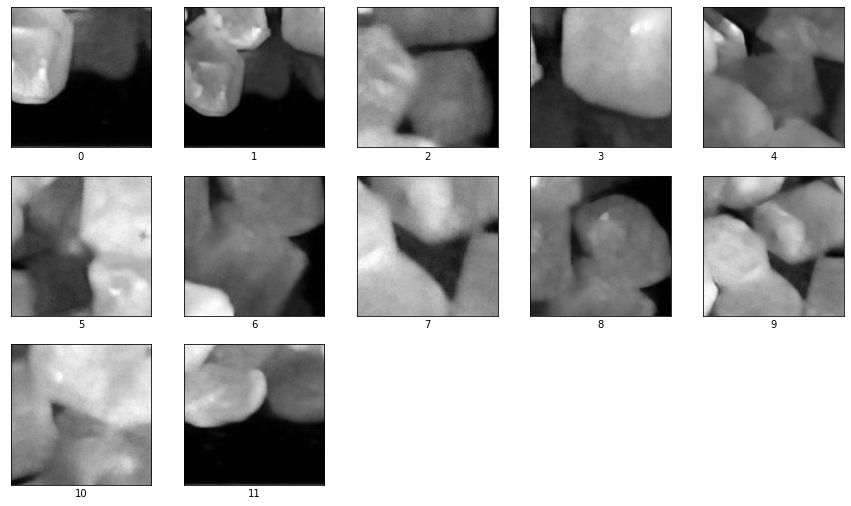

In [40]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [41]:
#4th middle

In [42]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_middle.append(Valor)

i= 0 =====
Tipo=B
i= 1 =====
Tipo=B
i= 2 =====
Tipo=V
i= 3 =====
Tipo=I
i= 4 =====
Tipo=V
i= 5 =====
Tipo=V
i= 6 =====
Tipo=V
i= 7 =====
Tipo=I
i= 8 =====
Tipo=G
i= 9 =====
Tipo=V
i= 10 =====
Tipo=I
i= 11 =====
Tipo=B


<Figure size 1080x1080 with 0 Axes>

In [43]:
# 5th middle

In [44]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [45]:
# 6th middle

In [46]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle,True)
#print(img28_middle)

In [47]:
# start bottom

In [48]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [49]:
# First bottom

In [50]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [51]:
# 2nd bottom

In [52]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [53]:
# 3th bottom

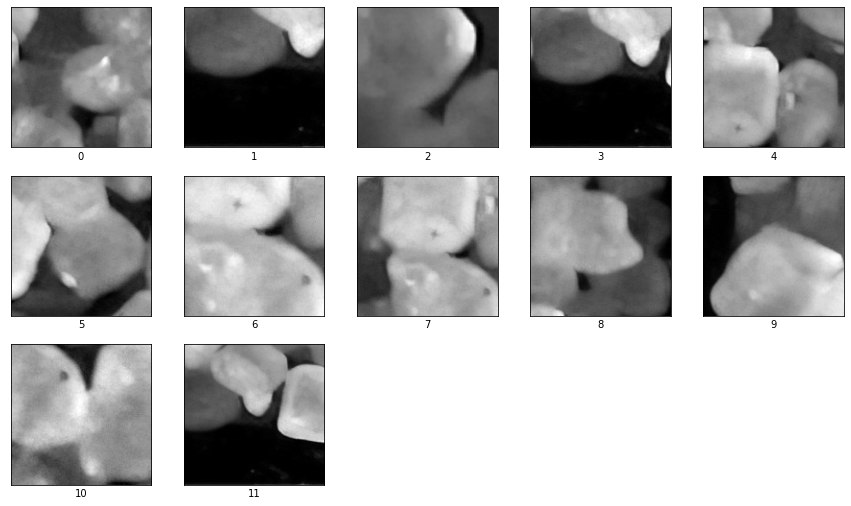

In [54]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [55]:
# 4th bottom

In [56]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_bottom.append(Valor)

i= 0 =====
Tipo=G
i= 1 =====
Tipo=B
i= 2 =====
Tipo=I
i= 3 =====
Tipo=B
i= 4 =====
Tipo=I
i= 5 =====
Tipo=G
i= 6 =====
Tipo=I
i= 7 =====
Tipo=I
i= 8 =====
Tipo=V
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=B


<Figure size 1080x1080 with 0 Axes>

In [57]:
# 5th bottom

In [58]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [59]:
# 6th bottom

In [60]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom,True)
#print(img28_bottom)

In [61]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
print(img28_all)

   Type           0           1  ...         781         782         783
0     G  107.923119  108.571747  ...   68.056602   73.477669   76.274536
1     V   33.440060   55.206326  ...    0.932553    0.915578    0.735594
2     I   64.248894   74.231117  ...   87.022232   86.804459   87.648895
3     V  178.497833  183.958344  ...    0.000000    0.000000    0.000000
4     V    0.000000    0.250000  ...   76.333336   74.472221   97.166664
5     G   46.327374   44.631996  ...    0.000799    0.000000    0.000000
6     I   56.919998   61.160000  ...   58.359997   55.439999   49.959999
7     V  102.135330  101.401337  ...   87.637398   89.739151   86.608994
8     B   95.789307   93.920319  ...   41.835915   42.290024   41.834385
9     V   74.458107   75.320274  ...  100.044655   93.843529  106.988197
10    B   47.949413   98.206116  ...   78.475502   78.190445   77.822266
11    V   77.696999   81.007858  ...  116.838936  112.481895  112.229858
0     B   75.405373   75.762192  ...    7.512349   

In [62]:
# found drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [63]:
img28_all.to_csv('img28_all.csv',float_format="%.5f")
# save in drive
!cp img28_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

cp: cannot create regular file 'drive/My Drive/Maria_Gabriela_Textura_dados_jan_2020/': Not a directory


In [64]:
img28_all=img28_all.drop(['Type'], axis = 1) 
print(img28_all)

           0           1           2    ...         781         782         783
0   107.923119  108.571747  105.653702  ...   68.056602   73.477669   76.274536
1    33.440060   55.206326   90.072182  ...    0.932553    0.915578    0.735594
2    64.248894   74.231117   82.195564  ...   87.022232   86.804459   87.648895
3   178.497833  183.958344  173.620850  ...    0.000000    0.000000    0.000000
4     0.000000    0.250000    0.138889  ...   76.333336   74.472221   97.166664
5    46.327374   44.631996   38.218533  ...    0.000799    0.000000    0.000000
6    56.919998   61.160000   87.680000  ...   58.359997   55.439999   49.959999
7   102.135330  101.401337  100.434914  ...   87.637398   89.739151   86.608994
8    95.789307   93.920319   99.450081  ...   41.835915   42.290024   41.834385
9    74.458107   75.320274   70.702087  ...  100.044655   93.843529  106.988197
10   47.949413   98.206116  107.393188  ...   78.475502   78.190445   77.822266
11   77.696999   81.007858   75.678947  

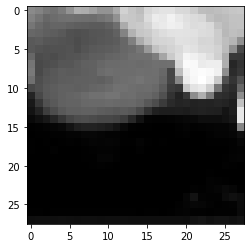

In [65]:
#img28_recovery=np.zeros((28,28))
Foto=np.array(img28_all.iloc[27]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")